In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
import gc

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing

In [4]:
##### Load data ####
file = '/Users/ketansand/Downloads/Flight_Data/2022/Atlanta.csv'
file_prev = '/Users/ketansand/Downloads/Flight_Data/2021/Atlanta.csv'

data_2022 = pd.read_csv(file)
data_2021 = pd.read_csv(file_prev)

#### only keeping days with delay ########

data_2022 = data_2022[data_2022['DEP_DELAY'] > 0]
data_2021 = data_2021[data_2021['DEP_DELAY'] > 0]

In [19]:
delay_time = data_2022['DEP_DELAY'].fillna(0)
data_2022['Date'] = pd.to_datetime(data_2022['FL_DATE'])

In [20]:
##### Keeping 70% for training and 30% for test #######
train_len = int(len(delay_time) * .7)
print(train_len)
delay_train = delay_time[:train_len].copy()
delay_test = delay_time[train_len:].copy()

83577


In [21]:
print(delay_train)

1         72.0
3         95.0
9          5.0
11         1.0
16         5.0
          ... 
217040     3.0
217042    44.0
217061     7.0
217063     9.0
217065    17.0
Name: DEP_DELAY, Length: 83577, dtype: float64


In [41]:
#### Trying holt winter #####
holt_winter = ExponentialSmoothing(delay_train,
                                   seasonal='mul',
                                   seasonal_periods=8).fit(smoothing_level=.4,
                                                            smoothing_trend=0,
                                                            smoothing_seasonal=.1,
                                                            optimized=True)

/Users/ketansand/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/Users/ketansand/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ketansand/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/ketansand/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ketansand/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

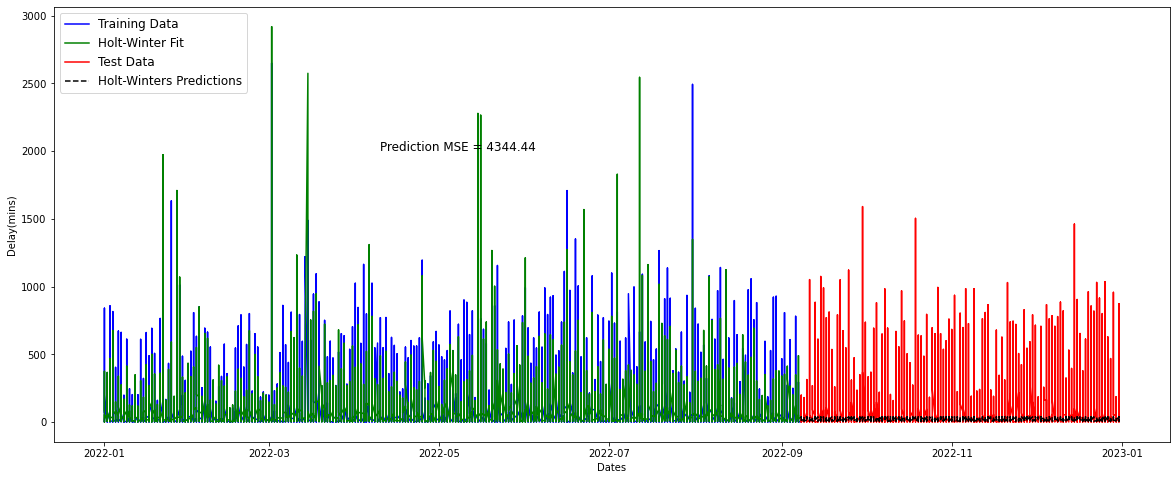

In [42]:
plt.figure(figsize=(20,8))




plt.plot(data_2022.Date[:train_len], 
         delay_time[:train_len],
         'b-',
         label="Training Data")
plt.plot(data_2022.Date[:train_len], 
         holt_winter.fittedvalues, 
         'g-',
         label="Holt-Winter Fit")

plt.plot(data_2022.Date[train_len:], 
         delay_time[train_len:],
         'r-',
         label="Test Data")

plt.plot(data_2022.Date[train_len:], 
         holt_winter.forecast(len(delay_test)),
         'k--',
         label="Holt-Winters Predictions")

plt.text(data_2022.Date[train_len],
         2000,
         "Prediction MSE = " + str(np.round(mean_squared_error(delay_time[train_len:],
                                                                  holt_winter.forecast(len(delay_test))), 2)),
         fontsize=12)
         
plt.xlabel("Dates")
plt.ylabel("Delay(mins)")

plt.legend(fontsize=12, loc=2)

plt.show()